In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\jules_7owst96\code\Grand Circus\Week5\flying-etiquette.csv")
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,45-60,150000,Bachelor degree,Pacific
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England


In [3]:
df.describe()

,RespondentID
count,1.040000e+03
mean,3.432711e+09
std,6.104183e+05
min,3.431730e+09
25%,3.432265e+09
50%,3.432672e+09
75%,3.433153e+09
max,3.436140e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                         

In [5]:
df.dtypes
# filter out numbers with...
df.select_dtypes(include='number').columns.to_list()

['RespondentID']

In [6]:
df.columns.to_list()

['RespondentID',
 'How often do you travel by plane?',
 'Do you ever recline your seat when you fly?',
 'How tall are you?',
 'Do you have any children under 18?',
 'In a row of three seats, who should get to use the two arm rests?',
 'In a row of two seats, who should get to use the middle arm rest?',
 'Who should have control over the window shade?',
 'Is itrude to move to an unsold seat on a plane?',
 'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
 "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",
 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
 'Is itrude to recline your seat on a plane?',
 'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
 'Is it rude to ask someone to switch seats with you in order to be closer to f

## Phase 1 - Preparing the Dataset
**Check for missing data, duplicates, outliers, blanks, wrong column types**

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# checking for missing values
df.isna().sum()

RespondentID                                                                                                                                  0
How often do you travel by plane?                                                                                                             0
Do you ever recline your seat when you fly?                                                                                                 182
How tall are you?                                                                                                                           182
Do you have any children under 18?                                                                                                          189
In a row of three seats, who should get to use the two arm rests?                                                                           184
In a row of two seats, who should get to use the middle arm rest?                                                                       

In [9]:
# Columns we want to keep based on questions 
columns_keep = ['RespondentID',
                'How often do you travel by plane?',
                'Do you ever recline your seat when you fly?',
                'In a row of three seats, who should get to use the two arm rests?',
                'In a row of two seats, who should get to use the middle arm rest?',
                'Is itrude to move to an unsold seat on a plane?',
                'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
                'How tall are you?',
                'Is it rude to ask someone to switch seats with you in order to be closer to friends?',
                'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?',
                'Gender',
                'Age']

df = df[columns_keep]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 12 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   In a row of three seats, who should get to use the two arm

In [10]:
# drop null values after deciding what columns we are keeping
df = df.dropna()
df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Is itrude to move to an unsold seat on a plane?,"Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",How tall are you?,Is it rude to ask someone to switch seats with you in order to be closer to friends?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Gender,Age
1,3434278696,Once a year or less,About half the time,The arm rests should be shared,The arm rests should be shared,"No, not rude at all","Yes, they should not recline their chair if th...","6'3""","No, not at all rude",No,Male,30-44
2,3434275578,Once a year or less,Usually,Whoever puts their arm on the arm rest first,The arm rests should be shared,"No, not rude at all","Yes, they should not recline their chair if th...","5'8""","No, not at all rude",No,Male,30-44
3,3434268208,Once a year or less,Always,The arm rests should be shared,The arm rests should be shared,"No, not rude at all","No, the person on the flight has no obligation...","5'11""","Yes, somewhat rude",No,Male,30-44
4,3434250245,Once a month or less,About half the time,The person in the middle seat gets both arm rests,The person in aisle,"No, not rude at all","No, the person on the flight has no obligation...","5'7""","No, not at all rude",No,Male,30-44
5,3434245875,Once a year or less,Usually,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,"Yes, somewhat rude","Yes, they should not recline their chair if th...","5'9""","Yes, somewhat rude",No,Male,30-44


In [11]:
# 2a: Change under 5ft to 5ft
# also change 6 ft and above so I could use stop of -1
df['How tall are you?'] = df['How tall are you?'].replace('''Under 5 ft.''', '''5'0"''')
df['How tall are you?'] = df['How tall are you?'].replace('''6'6" and above''', '''6'6"''')
df['How tall are you?'].value_counts()

How tall are you?
5'4"     77
5'7"     75
5'6"     75
5'8"     74
5'5"     71
5'9"     70
5'10"    66
6'0"     54
5'11"    53
5'3"     48
5'2"     44
5'0"     29
6'2"     27
6'1"     25
5'1"     19
6'3"     17
6'4"     11
6'5"      6
6'6"      2
Name: count, dtype: int64

In [12]:
# 2b: Create a new column, “Height (Inches)”, that converts the “How tall are you?” column in feet and inches to an integer of total inches.
feet = pd.to_numeric(df['How tall are you?'].str.slice(stop=1))
inches = pd.to_numeric(df['How tall are you?'].str.slice(start=2, stop=-1))

# Calculate total inches
df['Height (Inches)'] = (feet * 12) + inches
df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Is itrude to move to an unsold seat on a plane?,"Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",How tall are you?,Is it rude to ask someone to switch seats with you in order to be closer to friends?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Gender,Age,Height (Inches)
1,3434278696,Once a year or less,About half the time,The arm rests should be shared,The arm rests should be shared,"No, not rude at all","Yes, they should not recline their chair if th...","6'3""","No, not at all rude",No,Male,30-44,75
2,3434275578,Once a year or less,Usually,Whoever puts their arm on the arm rest first,The arm rests should be shared,"No, not rude at all","Yes, they should not recline their chair if th...","5'8""","No, not at all rude",No,Male,30-44,68
3,3434268208,Once a year or less,Always,The arm rests should be shared,The arm rests should be shared,"No, not rude at all","No, the person on the flight has no obligation...","5'11""","Yes, somewhat rude",No,Male,30-44,71
4,3434250245,Once a month or less,About half the time,The person in the middle seat gets both arm rests,The person in aisle,"No, not rude at all","No, the person on the flight has no obligation...","5'7""","No, not at all rude",No,Male,30-44,67
5,3434245875,Once a year or less,Usually,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,"Yes, somewhat rude","Yes, they should not recline their chair if th...","5'9""","Yes, somewhat rude",No,Male,30-44,69


## Phase 2 - Describing the Dataset
**reexamine after cleaning**

In [13]:
df.describe()

,RespondentID,Height (Inches)
count,8.430000e+02,843.000000
mean,3.432687e+09,67.442467
std,5.858570e+05,3.936847
min,3.431730e+09,60.000000
25%,3.432255e+09,64.000000
50%,3.432642e+09,67.000000
75%,3.433127e+09,70.000000
max,3.434279e+09,78.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 1 to 1039
Data columns (total 13 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              843 non-null    int64 
 1   How often do you travel by plane?                                                                                                         843 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               843 non-null    object
 3   In a row of three seats, who should get to use the two arm rests

## Phase 3 - Exploring the Dataset and Visualizing


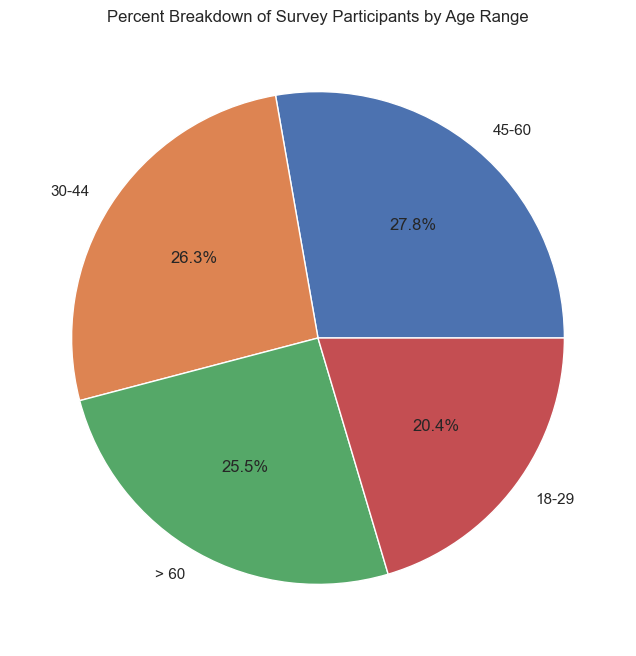

In [15]:
# 3a: Percent breakdown of survey participants by age range.
age_counts = df["Age"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title("Percent Breakdown of Survey Participants by Age Range")
plt.show()

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


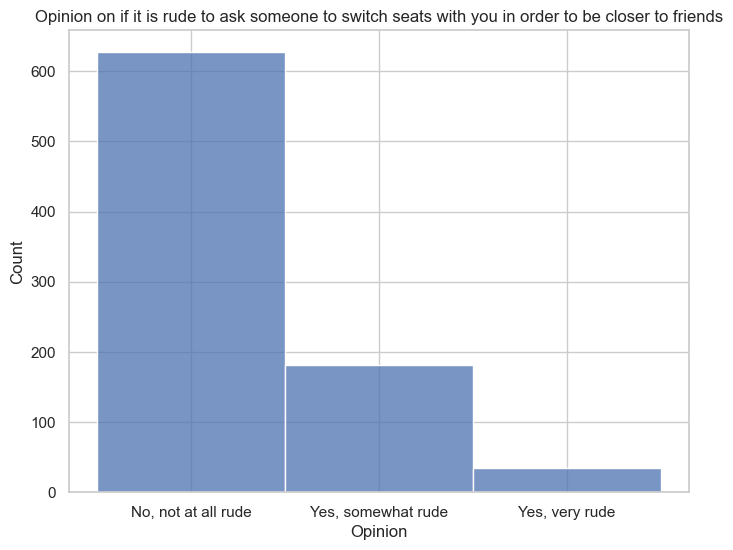

In [16]:
# 3b: How did survey respondents generally feel regarding if “it [was] rude to ask someone to switch seats with you in order to be closer to friends?”?
plt.figure(figsize=(8,6))
sns.histplot(x=df["Is it rude to ask someone to switch seats with you in order to be closer to friends?"], discrete=True)
plt.title("Opinion on if it is rude to ask someone to switch seats with you in order to be closer to friends")
plt.xlabel("Opinion")
plt.ylabel("Count")
plt.show()

C:\Users\jules_7owst96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


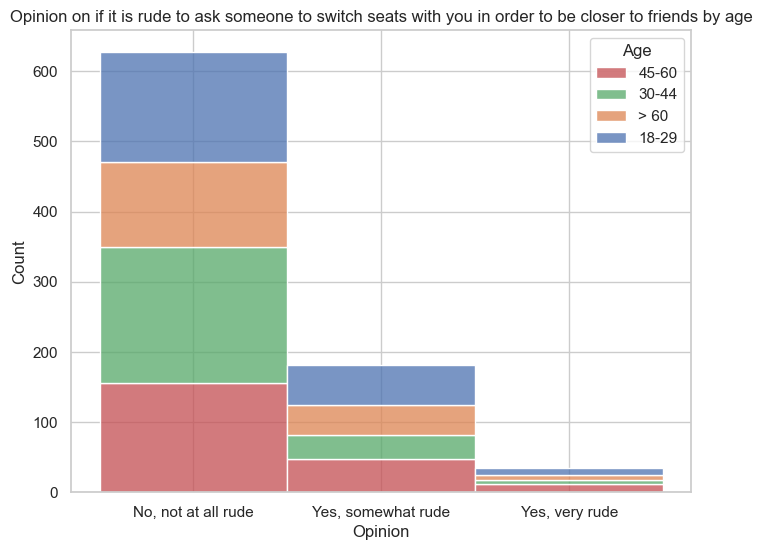

In [17]:
# 3c: Use the respondents age as a dimension to see if there are any differences to responses to “it [was] rude to ask someone to switch seats with you in order to be closer to friends?”?
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Is it rude to ask someone to switch seats with you in order to be closer to friends?", hue="Age", multiple="stack", discrete=True)
plt.title("Opinion on if it is rude to ask someone to switch seats with you in order to be closer to friends by age")
plt.xlabel("Opinion")
plt.ylabel("Count")
plt.legend(title="Age", labels=age_counts.index)
plt.show()

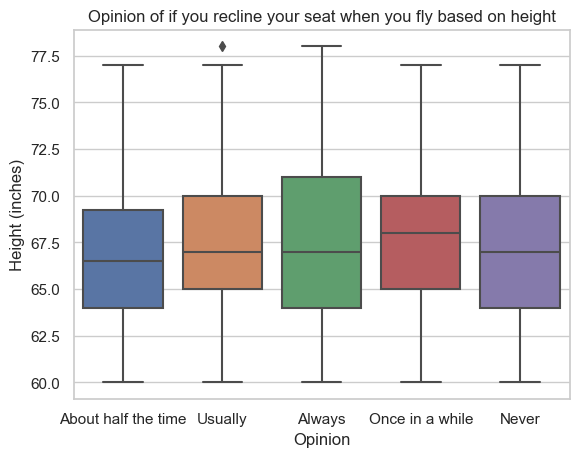

In [18]:
# 3d: What is the relationship between “Do you ever recline your seat when you fly?” and “How tall are you?”. How about other questions that might relate to height.
plt.figure(figure=(8,6))
sns.boxplot(data=df, x='Do you ever recline your seat when you fly?', y='Height (Inches)')
plt.title("Opinion of if you recline your seat when you fly based on height")
plt.xlabel("Opinion")
plt.ylabel("Height (inches)")
plt.show()

**Other questions that relate to height**
1. In a row of three seats, who should get to use the two arm rests?	
2. In a row of two seats, who should get to use the middle arm rest?	
3. Is it rude to move to an unsold seat on a plane?	
4. Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?	
5. Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?	

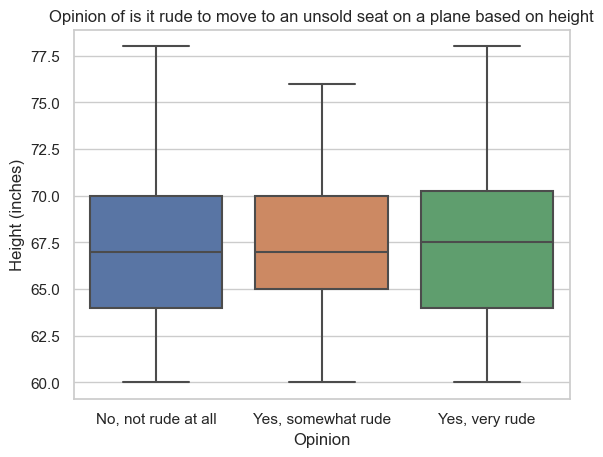

In [19]:
plt.figure(figure=(8,6))
sns.boxplot(data=df, x='Is itrude to move to an unsold seat on a plane?', y='Height (Inches)')
plt.title("Opinion of is it rude to move to an unsold seat on a plane based on height")
plt.xlabel("Opinion")
plt.ylabel("Height (inches)")
plt.show()

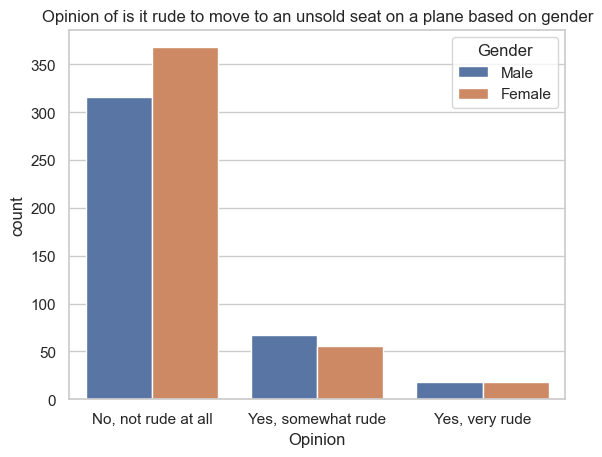

In [20]:
plt.figure(figure=(8,6))
sns.countplot(data=df, x='Is itrude to move to an unsold seat on a plane?', hue='Gender')
plt.title("Opinion of is it rude to move to an unsold seat on a plane based on gender")
plt.xlabel("Opinion")
plt.ylabel("count")
plt.legend(title="Gender")
plt.show()

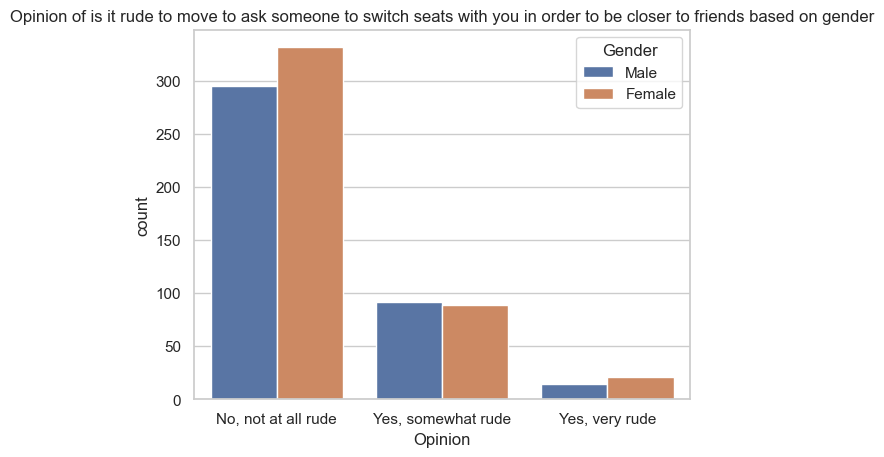

In [21]:
plt.figure(figure=(8,6))
sns.countplot(data=df, x='Is it rude to ask someone to switch seats with you in order to be closer to friends?', hue='Gender')
plt.title("Opinion of is it rude to move to ask someone to switch seats with you in order to be closer to friends based on gender")
plt.xlabel("Opinion")
plt.ylabel("count")
plt.legend(title="Gender")
plt.show()

## Phase 4 - Finalizing the Dataset


The dataset, after cleaning, is comprised of responses from 843 participants on various questions related to air travel etiquette, including opinions on reclining seats, armrest usage, seat switching, and more. I cut the survey size from 
1040 to 843 in order to clean the data by getting rid of any null or missing values and only keeping responses that related to the prompt.

The age distribution of participants showed a varied range, with no specific age group dominating the responses.
Gender also seemed to not have a huge impact on responses, outside of a slightly higher opinion of it not being rude to swtich seats to an unsold one or to be closer to friends.  

Opinions on reclining seats varied, with some participants considering it rude to recline one's seat and others not having an issue with it.
Regarding the question of asking someone to switch seats to be closer to friends, opinions seemed to greatly lean towards not finding it rude. Including age in this analysis didn't seem to have a huge impact, outside of the age range of 30-44 having a slightly higher proportion not finding it rude to switch seats. 

Analysis didn't show a major relationship between a respondent's height and their tendency to recline seats during flights or their opinion on switching seats. Further exploration into other questions related to height, such as armrest usage and the potential of removing the option to recline, could provide insights into how height influences perceptions of comfort and personal space on flights.